# Texas Accidents and the Weather

From 2017 to 2019, there were 248,299 traffic accidents on Texas roads. What role did weath play in those accidents?

In [2]:
#Creating Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [3]:
#Open Texas Traffic CSV File

traffic_df = pd.read_csv("../data/outTX.csv")
traffic_df

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,m_start,m_end,s_start,s_end,sec_start,sec_end,duration,season_start,season_end,day_of_week
0,267710,A-267712,MapQuest,201.0,2,2017-01-02 14:40:12,2017-01-02 15:39:53,30.393579,-97.745979,NaN,...,40,39,12,53,52812,56393,3581,winter,1,Monday
1,267711,A-267713,MapQuest,201.0,2,2017-01-02 14:28:48,2017-01-02 15:28:36,30.256216,-97.722038,NaN,...,28,28,48,36,52128,55716,3588,winter,1,Monday
2,267712,A-267714,MapQuest,201.0,2,2017-01-02 14:04:17,2017-01-02 15:05:00,30.418287,-97.700874,NaN,...,4,5,17,0,50657,54300,3643,winter,1,Monday
3,267713,A-267715,MapQuest,201.0,2,2017-01-02 14:29:13,2017-01-02 15:35:00,30.237938,-97.696167,NaN,...,29,35,13,0,52153,56100,3947,winter,1,Monday
4,267714,A-267716,MapQuest,201.0,2,2017-01-02 14:40:51,2017-01-02 15:40:23,30.364882,-97.695992,NaN,...,40,40,51,23,52851,56423,3572,winter,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248293,3513349,A-3513513,Bing,NaN,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,29.742630,...,16,45,19,28,47779,49528,1749,summer,8,Friday
248294,3513350,A-3513514,Bing,NaN,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,29.774183,...,4,33,19,52,47059,48832,1773,summer,8,Friday
248295,3513351,A-3513515,Bing,NaN,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,29.774180,...,0,30,34,14,46834,48614,1780,summer,8,Friday
248296,3513353,A-3513517,Bing,NaN,3,2019-08-23 16:44:23,2019-08-23 17:11:49,29.941686,-95.295187,29.926120,...,44,11,23,49,60263,61909,1646,summer,8,Friday


In [4]:
#Creat Data to review accidents by season

seasons_df=traffic_df[['season_start', 'Severity']]
seasonsgroup_df=seasons_df.groupby(['season_start'])
seasonsgroup_df.count()


,Severity
season_start,
fall,64670
spring,61900
summer,58544
winter,63184


# Are there more accidents in one particular season vs. another?

There is no significant difference in the number of accidents in Texas between each of the seasons.   Fall is slightly higher than the rest of the seasons.

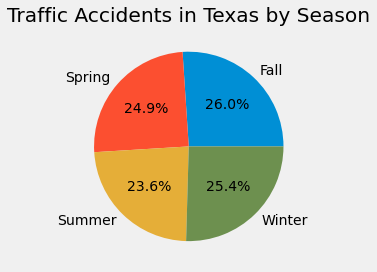

In [5]:
#Creating the seasonal pie chart

plt.style.use("fivethirtyeight")
slices = [64670, 61900, 58544,63184]
labels = ["Fall", "Spring", "Summer", "Winter"]

plt.pie(slices, labels=labels, autopct='%1.1f%%')
plt.title("Traffic Accidents in Texas by Season")
plt.tight_layout()

plt.savefig('TAbyseason.png',bbox_inches='tight')


# What effect does weather have on accidents in Texas?

The majority of the accidents in Texas occur on clear days.  Mostly cloudy was in second place.  An interesting fact is that one might assume more accidents would occur during heavy rains, this was not the case, light rain had more accidents than the heavy rain.  One conclusion may be that drivers are more cautious during heavy rainstorms, while people do not take slick roads into consideration for the lighter rain periods.   

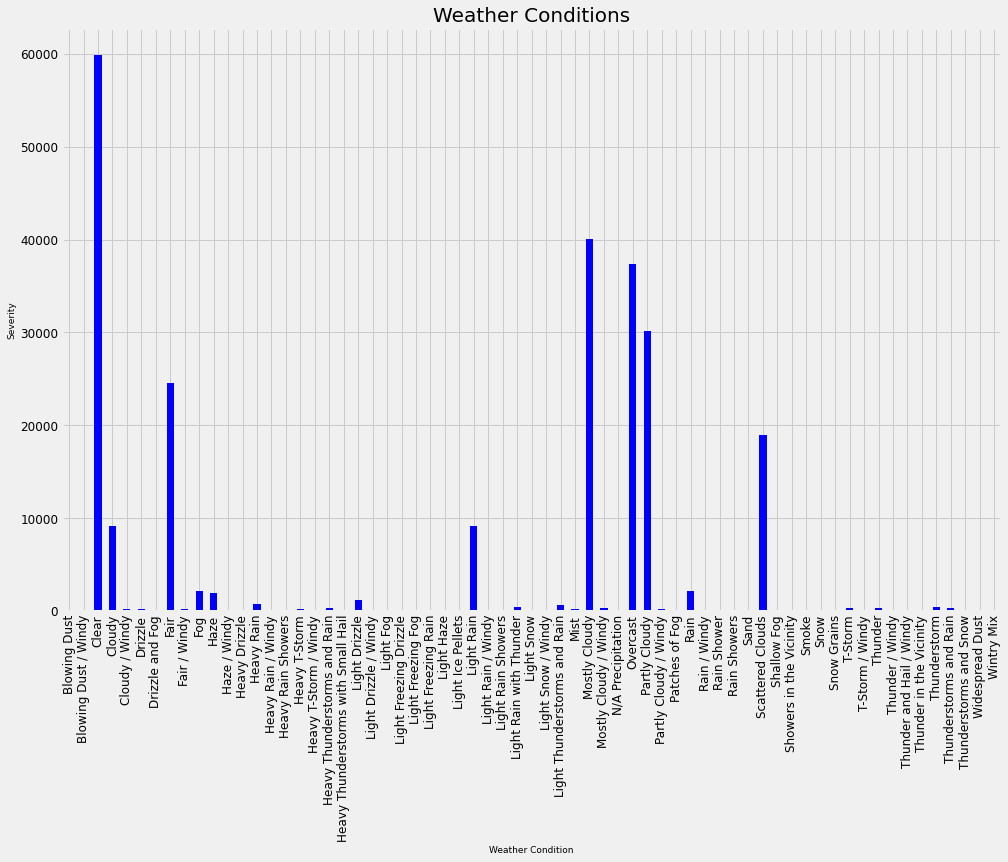

<Figure size 432x288 with 0 Axes>

In [7]:
#Generating a bar plot showing the severity of accident by weather condition
wcond_df=traffic_df.groupby(['Weather_Condition']).count()['Severity']
plot_pd=wcond_df.plot.bar(figsize=(15,10), color='b', fontsize=12)


wcond_df

#Formatting

plt.xlabel("Weather Condition", fontsize=9)
plt.ylabel("Severity", fontsize=9)
plt.title("Weather Conditions", fontsize=20)

plt.tight_layout
plt.show()

plt.savefig('WeatherConditions.png',bbox_inches='tight')

In [7]:
#Create DataFrame to review top 10 Weather Conditions broken down by time of day

weather = ['Clear','Mostly Cloudy','Overcast','Partly Cloudy', 'Fair', 'Scattered Clouds','Light Rain', 'Cloudy', '(blank)', 'Fog']
day = [44308, 32909, 26732, 25283,19208, 16110,6978,6967,4550,1560]
night = [15529,7195,10672,4818,5296,2871,2211,2188,1325,588]

cond_table=pd.DataFrame({'Weather': weather, 'Day': day, 'Night': night})
cond_table


,Weather,Day,Night
0,Clear,44308,15529
1,Mostly Cloudy,32909,7195
2,Overcast,26732,10672
3,Partly Cloudy,25283,4818
4,Fair,19208,5296
5,Scattered Clouds,16110,2871
6,Light Rain,6978,2211
7,Cloudy,6967,2188
8,(blank),4550,1325
9,Fog,1560,588


More accidents occur during day no matter what the weather type might be.  There was no correlation in the top 10 weather conditions and the time of day.

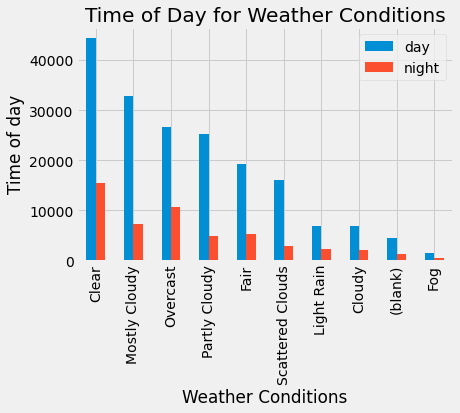

In [8]:
#Created A comparison bar of the time of day vs. weather condition

condtable_df=pd.DataFrame({
    "day": [44308, 32909, 26732, 25283,19208, 16110,6978,6967,4550,1560],
    "night": [15529,7195,10672,4818,5296,2871,2211,2188,1325,588]},
     index =['Clear','Mostly Cloudy','Overcast','Partly Cloudy', 'Fair', 'Scattered Clouds','Light Rain', 'Cloudy', '(blank)', 'Fog'])

condtable_df.plot(kind='bar')
plt.title("Time of Day for Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Time of day")

plt.savefig('TODWeatherConditions.png',bbox_inches='tight')

     

In [9]:
# Create a DataFrame that takes a look at the severity of accidents during the top 10 Weather Conditions.

weather = ['Clear','Mostly Cloudy','Overcast','Partly Cloudy', 'Fair', 'Scattered Clouds','Light Rain', 'Cloudy', '(blank)', 'Fog']
SevOne = [29,16,16,7,4,9,7,4,0,1]
SevTwo = [42563,29155,26816,22204,17766,13562,6497,6897,3506,1657]
SevThree = [16476,10484,10085,7608,6400,5198,2599,2133,2293,457]
SevFour = [769,449,487,282,334,212,86,121,76,33]

cond_table2=pd.DataFrame({'Weather': weather, 'Severity1': SevOne, 'Severity2': SevTwo, 'Severity3': SevThree, 'Severity4': SevFour})
cond_table2

,Weather,Severity1,Severity2,Severity3,Severity4
0,Clear,29,42563,16476,769
1,Mostly Cloudy,16,29155,10484,449
2,Overcast,16,26816,10085,487
3,Partly Cloudy,7,22204,7608,282
4,Fair,4,17766,6400,334
5,Scattered Clouds,9,13562,5198,212
6,Light Rain,7,6497,2599,86
7,Cloudy,4,6897,2133,121
8,(blank),0,3506,2293,76
9,Fog,1,1657,457,33


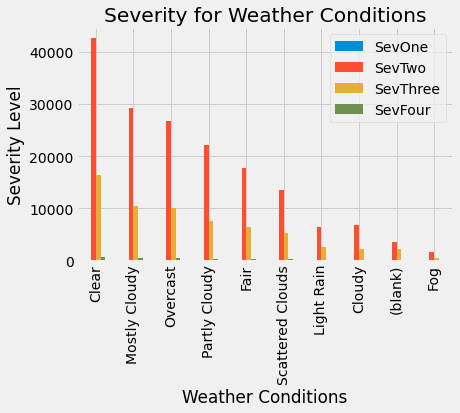

In [10]:
# Create a bar chart that takes a look at the severity of accidents during the top 10 Weather Conditions.

condtable2_df=pd.DataFrame({
    "SevOne": [29,16,16,7,4,9,7,4,0,1],
    "SevTwo": [42563,29155,26816,22204,17766,13562,6497,6897,3506,1657],
    "SevThree" : [16476,10484,10085,7608,6400,5198,2599,2133,2293,457],
    "SevFour": [769,449,487,282,334,212,86,121,76,33]},
    
     index =['Clear','Mostly Cloudy','Overcast','Partly Cloudy', 'Fair', 'Scattered Clouds','Light Rain', 'Cloudy', '(blank)', 'Fog'])

condtable2_df.plot(kind='bar')
plt.title("Severity for Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Severity Level")

plt.savefig('SeverityWeatherConditions.png',bbox_inches='tight')

Severity shows the severity of the accident in terms of traffic impact. One being the least, four being the most.  In the top 10 weather conditions, the majority of the accidents fall into the 2 and 3 severity levels. For the most part, they fall into category 2 meaning that there is a slight delay when an accident occors. 

# What role does visibility play?

The majority of accidents occur when visibility is at 10 miles, indication that other distractions must be driving those accidents.  There is no clear visibility issues within the data set. 

In [11]:
vis_df=traffic_df[['Visibility(mi)', 'Severity']]
visgroup_df=vis_df.groupby(['Visibility(mi)'])
visgroup_df.count()

,Severity
Visibility(mi),
0.00,60
0.06,5
0.10,162
0.12,11
0.20,1245
0.25,84
0.40,19
0.50,812
0.60,3


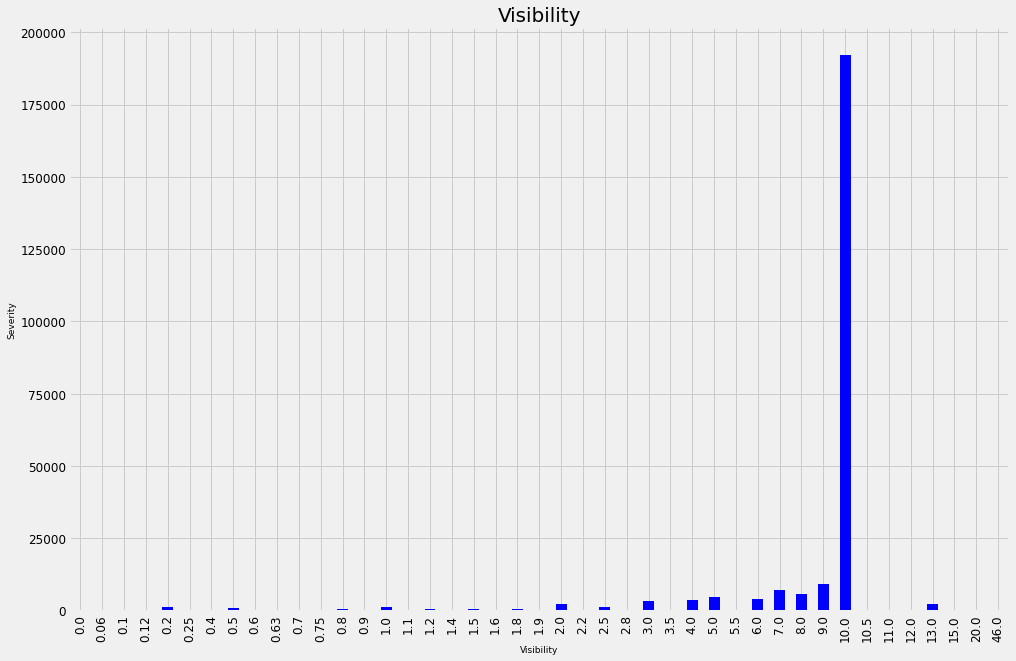

<Figure size 432x288 with 0 Axes>

In [12]:
# change to top 10, then a scatter plot severity vs. visibility.


#Generating a bar plot showing the severity of accident by visibility
vis_df=traffic_df.groupby(['Visibility(mi)']).count()['Severity']
plot_pd=vis_df.plot.bar(figsize=(15,10), color='b', fontsize=12)


vis_df

#Formatting

plt.xlabel("Visibility", fontsize=9)
plt.ylabel("Severity", fontsize=9)
plt.title("Visibility", fontsize=20)

plt.tight_layout
plt.show()

plt.savefig('Visibility.png',bbox_inches='tight')